<a href="https://colab.research.google.com/github/nehalmuthu/Covid-Simulation-in-Federated-Environment/blob/master/EpidemicModelSimulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gekko

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
s=pd.read_csv("/content/gdrive/MyDrive/FedLearningCovid/USData/nst-est2020.csv")

In [3]:
s

,state,population
0,Alabama,4907965
1,Alaska,733603
2,Arizona,7291843
3,Arkansas,3020985
4,California,39437610
5,Colorado,5758486
6,Connecticut,3566022
7,Delaware,976668
8,District of Columbia,708253
9,Florida,21492056


In [13]:
df=pd.read_csv('/content/gdrive/MyDrive/FedLearningCovid/USData/us-states.csv')

df=df[df['date']>='2021-06-01']
df=df[df['date']<='2021-07-01']

In [14]:
df[df['state']=='Washington']

,date,state,fips,cases,deaths
25090,2021-06-01,Washington,53,438918,5833
25145,2021-06-02,Washington,53,439675,5845
25200,2021-06-03,Washington,53,440538,5866
25255,2021-06-04,Washington,53,441271,5881
25310,2021-06-05,Washington,53,441926,5881
25365,2021-06-06,Washington,53,442006,5881
25420,2021-06-07,Washington,53,442762,5894
25475,2021-06-08,Washington,53,443564,5821
25530,2021-06-09,Washington,53,444159,5836
25585,2021-06-10,Washington,53,444922,5846


In [5]:
def covid(x,t):
  s,e,i,r = x
  dx = np.zeros(4)
  dx[0] = -(1-u)*beta * s * i
  dx[1] = (1-u)*beta * s * i - alpha * e
  dx[2] = alpha * e - gamma * i
  dx[3] = gamma*i
  return dx

def simulateSEIR(u,x0,t1,t2):

  t = np.linspace(0, t1, t2)
  x = odeint(covid,x0,t)
  s = x[:,0]; e = x[:,1]; i = x[:,2]; r = x[:,3]

  # plot the data
  plt.figure(figsize=(8,5))

  plt.subplot(2,1,1)
  plt.title('Social Distancing = '+str(u*100)+'%')
  plt.plot(t,s, color='blue', lw=3, label='Susceptible')
  plt.plot(t,r, color='red',  lw=3, label='Recovered')
  plt.ylabel('Fraction')
  plt.legend()

  plt.subplot(2,1,2)
  plt.plot(t,i, color='orange', lw=3, label='Infective')
  plt.plot(t,e, color='purple', lw=3, label='Exposed')
  plt.ylim(0, .5)
  plt.xlabel('Time (days)')
  plt.ylabel('Fraction')
  plt.legend()

  plt.show()

  return pd.DataFrame(list(zip(s,e,i,r)),columns =['s','e','i','r'])



In [6]:
u = 0.1  # social distancing (0-1)
         # 0   = no social distancing
         # 0.1 = masks
         # 0.2 = masks and hybrid classes
         # 0.3 = masks, hybrid, and online classes
t_incubation = 7
t_infective = 3.3
R0=2
  # initial number of infected and recovered individuals
        
t1=1000
t2=1001


alpha = 1/t_incubation
 

0.14285714285714285
0.011674899882130375
0.0032273515917187316


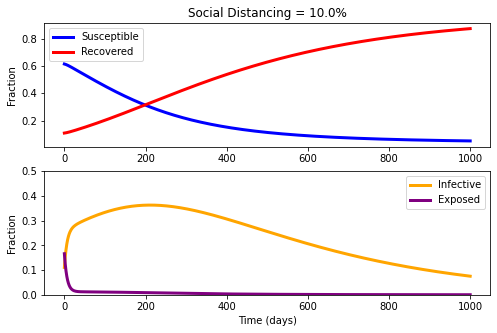

In [10]:
u=.1
N = 4907965 


e0=(544045*1.5)/N
i0=544045	/N
r0=532889/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=573/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

alabama_df=simulateSEIR(u,x0,t1,t2)

0.14285714285714285
0.00810977051954281
0.002442870349158038


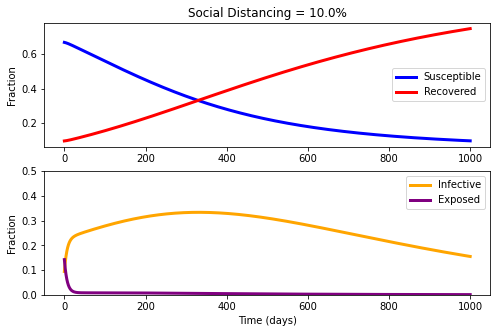

In [7]:
u=.1
N = 5758486 

e0=(546596*1.5)/N
i0=544045	/N
r0=539873/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=467/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

colorado_df=simulateSEIR(u,x0,t1,t2)

0.14285714285714285
0.008496661147563526
0.00245179535677162


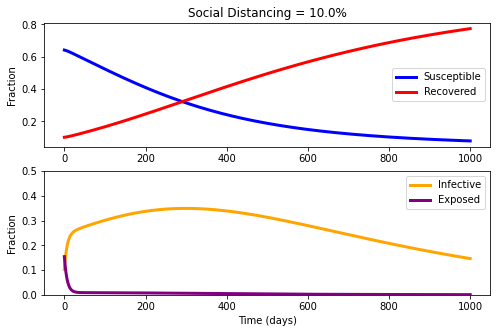

In [8]:
u=.1
N = 4472345 

e0=(460454*1.5)/N
i0=460454	/N
r0=453345/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=380/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

kentucky_df=simulateSEIR(u,x0,t1,t2)

0.14285714285714285
0.0032801110202333207
0.0009269553743648197


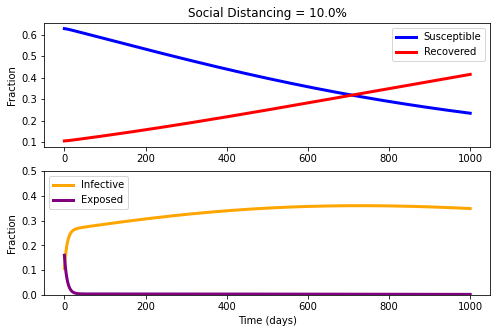

In [25]:
u=.1
N = 5640053 

e0=(601610*1.5)/N
i0=601610	/N
r0=594090/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=185/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

minnesota_df=simulateSEIR(u,x0,t1,t2)



0.14285714285714285
0.009456234968526498
0.0034000109807888557


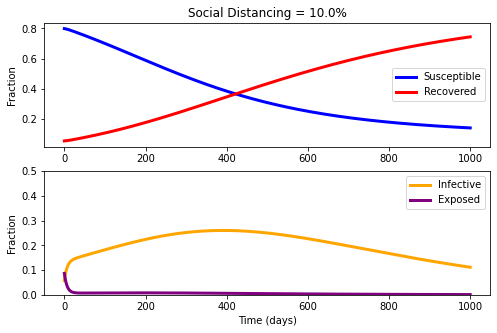

In [16]:
u=.1
N = 7614024 

e0=(438918*1.5)/N
i0=438918	/N
r0=433085/N
s0 = 1 - e0 - i0 - r0


x0 = [s0,e0,i0,r0]

beta=720/N

gamma = ((1-u)*beta*s0)/R0

beta=beta*100
gamma=gamma*100
print(alpha)
print(beta)
print(gamma)

washington_df=simulateSEIR(u,x0,t1,t2)



Text(0, 0.5, 'Susceptible Fraction(in %)')

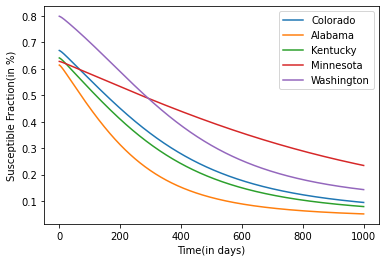

In [26]:
plt.plot(colorado_df.s,label='Colorado')
plt.plot(alabama_df.s,label='Alabama')
plt.plot(kentucky_df.s,label='Kentucky')
plt.plot(minnesota_df.s,label='Minnesota')
plt.plot(washington_df.s,label='Washington')

#plt.plot(wisconsin_df.s,label='Wisconsin')
#plt.plot(virginia_df.s,label='Virginia')
#plt.plot(southcar_df.s,label='South Carolina')

plt.legend()
plt.xlabel('Time(in days)')
plt.ylabel('Susceptible Fraction(in %)')


Text(0, 0.5, 'Exposed Fraction(in %)')

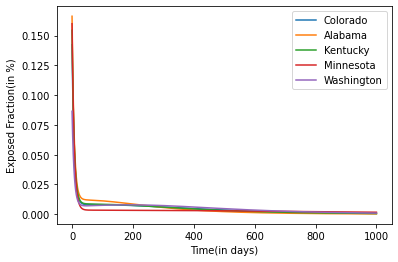

In [27]:
plt.plot(colorado_df.e,label='Colorado')
plt.plot(alabama_df.e,label='Alabama')
plt.plot(kentucky_df.e,label='Kentucky')
plt.plot(minnesota_df.e,label='Minnesota')
plt.plot(washington_df.e,label='Washington')

plt.legend()
plt.xlabel('Time(in days)')
plt.ylabel('Exposed Fraction(in %)')



Text(0, 0.5, 'Infrection Fraction(in %)')

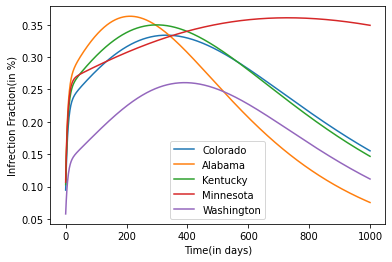

In [28]:
plt.plot(colorado_df.i,label='Colorado')
plt.plot(alabama_df.i,label='Alabama')
plt.plot(kentucky_df.i,label='Kentucky')
plt.plot(minnesota_df.i,label='Minnesota')
plt.plot(washington_df.i,label='Washington')

plt.legend()
plt.xlabel('Time(in days)')
plt.ylabel('Infrection Fraction(in %)')



Text(0, 0.5, 'Recovery Fraction(in %)')

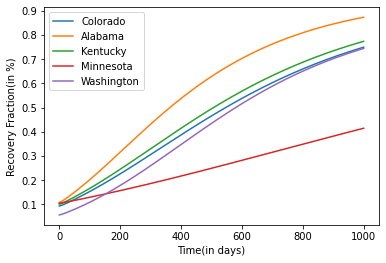

In [29]:
plt.plot(colorado_df.r,label='Colorado')
plt.plot(alabama_df.r,label='Alabama')
plt.plot(kentucky_df.r,label='Kentucky')
plt.plot(minnesota_df.r,label='Minnesota')
plt.plot(washington_df.r,label='Washington')


plt.legend()
plt.xlabel('Time(in days)')
plt.ylabel('Recovery Fraction(in %)')



In [34]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

t_incubation = 7
t_infective = 3.3
R0 = 2
N = 4658285

# fraction of infected and recovered individuals
#e_initial = 471663/N
#i_initial = 471663/N
#r_initial = 261071/N

e_initial=(546596*1.5)/N
i_initial=544045	/N
r_initial=539873/N

s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
#beta=750/N
beta = 685/N
gamma = (beta)/R0

beta=beta*500
gamma=gamma*100


apm 35.231.162.194_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            5
   Residuals    :            5
 
 Variable time shift OFF
 Number of state variables:           9020
 Number of total equations: -         8610
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            410
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


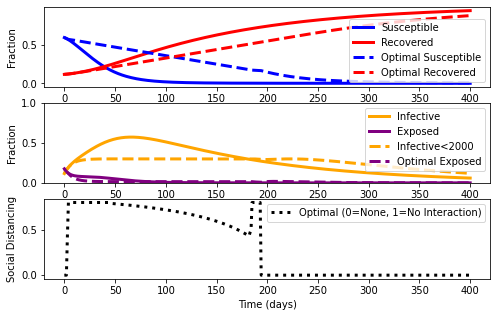

In [35]:

m = GEKKO()
u = m.MV(0,lb=0.0,ub=0.8)

s,e,i,r = m.Array(m.Var,4)
s.value = s_initial
e.value = e_initial
i.value = i_initial
r.value = r_initial
m.Equations([s.dt()==-(1-u)*beta * s * i,\
             e.dt()== (1-u)*beta * s * i - alpha * e,\
             i.dt()==alpha * e - gamma * i,\
             r.dt()==gamma*i])

t = np.linspace(0, 400, 401)
t = np.insert(t,1,[0.001,0.002,0.004,0.008,0.02,0.04,0.08,\
                   0.2,0.4,0.8])
m.time = t

# initialize with simulation
m.options.IMODE=7
m.options.NODES=3
m.solve(disp=False)

# plot the prediction
plt.figure(figsize=(8,5))
plt.subplot(3,1,1)
plt.plot(m.time, s.value, color='blue', lw=3, label='Susceptible')
plt.plot(m.time, r.value, color='red',  lw=3, label='Recovered')

plt.subplot(3,1,2)
plt.plot(m.time, i.value, color='orange', lw=3, label='Infective')
plt.plot(m.time, e.value, color='purple', lw=3, label='Exposed')

# optimize
m.options.IMODE=6
i.UPPER = 0.3
u.STATUS = 1
m.options.SOLVER = 3
m.options.TIME_SHIFT = 0
s.value = s.value.value
e.value = e.value.value
i.value = i.value.value
r.value = r.value.value
m.Minimize(u)
m.solve(disp=True)

# plot the optimized response
plt.subplot(3,1,1)
plt.plot(m.time, s.value, color='blue', lw=3, ls='--', label='Optimal Susceptible')
plt.plot(m.time, r.value, color='red',  lw=3, ls='--', label='Optimal Recovered')
plt.ylabel('Fraction')
plt.legend()

plt.subplot(3,1,2)
plt.plot(m.time, i.value, color='orange', ls='--', lw=3, label='Infective<2000')
plt.plot(m.time, e.value, color='purple', ls='--', lw=3, label='Optimal Exposed')
plt.ylim(0, 1)
plt.ylabel('Fraction')
plt.legend()

plt.subplot(3,1,3)
plt.plot(m.time, u.value, 'k:', lw=3, label='Optimal (0=None, 1=No Interaction)')
plt.ylabel('Social Distancing')
plt.legend()

plt.xlabel('Time (days)')

plt.show()